In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('weight-height.csv')

In [57]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [58]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [59]:
df.shape

(10000, 3)

In [60]:
"""
from PIL import Image
img = Image.open('out.gif')
img
"""

"\nfrom PIL import Image\nimg = Image.open('out.gif')\nimg\n"

# Removing Outliers

<Axes: xlabel='Weight', ylabel='Count'>

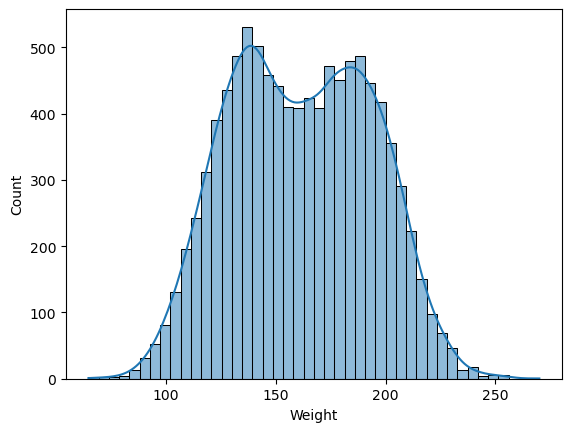

In [61]:
sns.histplot(df['Weight'], kde=True)

In [62]:
mean_value = df['Weight'].mean()  #calculate mean value
mean_value 

161.44035683283076

In [63]:
std_value = df['Weight'].std() #Calculate Standard Deviation
std_value

32.108439006519546

In [64]:
std_plus_3 = mean_value + (3 * std_value ) #you can use 2.5 std to more clean
std_plus_3

257.7656738523894

In [65]:
neg_std_3 = mean_value - (3 * std_value )  #you can use 2.5 std to more clean
neg_std_3

65.11503981327212

In [66]:
df[df['Weight'] > std_plus_3]   #Outlier value (+3)

,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [67]:
df[df['Weight'] < neg_std_3]  #Outlier value (-3)

,Gender,Height,Weight
9285,Female,54.263133,64.700127


In [68]:
merge_outliers = df[(df['Weight'] > std_plus_3) | (df['Weight'] < neg_std_3)]   # Merge two type of outliers

In [69]:
merge_outliers

,Gender,Height,Weight
2014,Male,78.998742,269.989699
9285,Female,54.263133,64.700127


In [70]:
merge_outliers.shape

(2, 3)

In [71]:
remove_out_columns = df[(df['Weight'] < std_plus_3) & (df['Weight'] > neg_std_3)]  #drop all outliers

In [72]:
remove_out_columns

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [73]:
remove_out_columns.shape

(9998, 3)

<Axes: xlabel='Weight', ylabel='Count'>

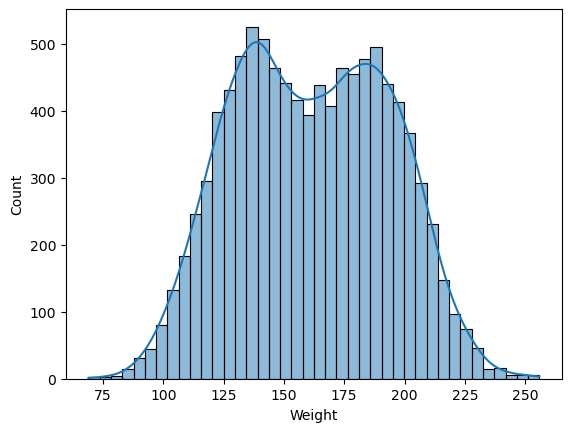

In [74]:
sns.histplot(remove_out_columns['Weight'], kde=True)

# One Hot Encoding

In [75]:
dummy_variables = pd.get_dummies(remove_out_columns['Gender'], drop_first=True)  #true means it will drop one dummy variable

In [76]:
dummy_variables

,Male
0,1
1,1
2,1
3,1
4,1
...,...
9995,0
9996,0
9997,0
9998,0


In [77]:
new_df = remove_out_columns.drop('Gender',axis=1)

In [78]:
new_df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [79]:
df = pd.concat([new_df,dummy_variables], axis=1) #Concat two data frame

In [80]:
df.head()

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [81]:
df.tail()

,Height,Weight,Male
9995,66.172652,136.777454,0
9996,67.067155,170.867906,0
9997,63.867992,128.475319,0
9998,69.034243,163.852461,0
9999,61.944246,113.649103,0


In [82]:
x = df.drop('Height', axis=1)

In [83]:
x.head()

,Weight,Male
0,241.893563,1
1,162.310473,1
2,212.740856,1
3,220.042470,1
4,206.349801,1


In [84]:
y = df['Height']

In [85]:
y.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

# Train Test

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
#split dataset into train and test
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30,random_state=42)

In [88]:
xtrain.shape

(6998, 2)

In [89]:
xtest.shape

(3000, 2)

# Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
reg  = LinearRegression() #create linear reg object

In [92]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [93]:
reg.score(xtest,ytest)

0.8570480760433349

In [94]:
reg.coef_   # coefficient in linear regression

array([ 0.12307758, -0.99148292])

In [95]:
reg.intercept_  # value of intercept

46.98654372848976

In [96]:
reg.predict(xtest)

array([70.1628629 , 67.85037173, 66.94501359, ..., 68.24803581,
       62.93872445, 70.96332948])

In [97]:
reg.predict(xtest).shape

(3000,)

# Model Evaluation (r2_score)

In [98]:
from sklearn.metrics import mean_squared_error, r2_score

In [99]:
pred = reg.predict(xtest)

In [100]:
pred

array([70.1628629 , 67.85037173, 66.94501359, ..., 68.24803581,
       62.93872445, 70.96332948])

In [101]:
mean_squared_error(ytest, pred)

2.133724214923081

In [102]:
r2_score(ytest,pred)

0.8570480760433349

# KNN Regression 

In [103]:
from sklearn.neighbors import KNeighborsRegressor

In [104]:
neigh = KNeighborsRegressor(n_neighbors=100)

In [105]:
neigh.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=100)

In [106]:
pred2 = neigh.predict(xtest)

In [107]:
pred2

array([70.0451706 , 67.81031828, 67.03716747, ..., 68.25532379,
       64.0320855 , 70.89293634])

In [108]:
mean_squared_error(ytest, pred2)

2.1934581407254212

In [109]:
r2_score(ytest,pred2)

0.8530461157341217